We nned to create: 
1/a 2D array to represent the states in the environment (done)
2/a q-table dictionary for each of the state, filed with uniformly distributed values between 110-120 (done)
3/a loop that gives -1 reward for each step taken, and -30 reward when in the hole region, and +100 reward when reaching the goal
4/the action of the agent + the randomness of the action
5/an agent that starts from state 1, and stops at state 25, then starts a new iteration. 1000 iterations are performed.


{1: [79.82973699525704, 113.65659729811415, 42.99481760827571, 111.65121919686828], 2: [63.853228133154545, 118.2024495591768, -1334.417846115563, -1516.979795726821], 3: [-4.552238653459595, 110.69426657306957, -1439.7801371295438, -1917.347767255153], 4: [-575.8738752005835, 118.93529500710699, -483.18013332905787, -1706.719684121169], 5: [-404.2700056097825, 114.6967569498269, 113.97189868377669, -538.282424070429], 6: [84.29242750489517, 23.393294394705066, 56.71678114453104, 113.52398997425139], 7: [-90.64432348109956, 22.549352061743694, 59.61261719694509, -117.0117677504355], 8: [58.253900283411944, -19.13144674901644, -104.13443246133527, -46.71183211053001], 9: [-1081.0977262792544, -1017.370260598359, -1378.265299865123, 48.520529733308535], 10: [52.249557886149894, -473.20807795994097, 113.06650266546183, -1767.3081914005647], 11: [-470.1156055826698, -466.83490807643614, 85.4295259490276, 116.49941258440047], 12: [86.90151172500785, -843.3741435131888, -1009.9782281598281, 

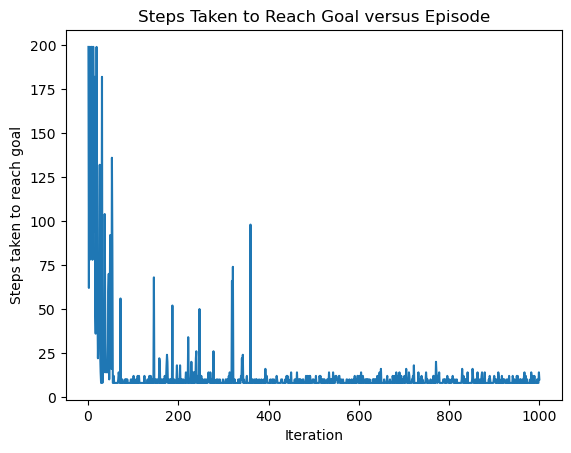

In [ ]:
#1/a 2D array to represent the states in the environment (done)
environment = [(25,24,23,22,21),
(20,19,18,17,16),
(15,14,13,12,11),
(10,9,8,7,6),
(5,4,3,2,1)]

#2/a q-table dictionary for each of the state, filed with uniformly distributed values between 110-120
import random
states = list(range(1, 25, 1))
#generate a list of 4 uniformly distributed random values between 110 and 120
q_table = {
    state: [random.uniform(110, 120) for _ in range(4)]
    for state in states
}


#3/a loop that gives -1 reward for each step taken, and -30 reward when in the hole region, and +100 reward when reaching the goal
direction = [5,-5,1,-1] #up, down, left, right
S0 = 1 #initial position
next_state = S0;

step_memory = {}

#4/the action of the agent + the randomness of the action
def decision(start_state):
    if start_state == 1:
        options = [q_table[start_state][i] for i in [0,2]]    
    elif start_state == 5:
        options = [q_table[start_state][i] for i in [0,3]]
    elif start_state == 21:
        options = [q_table[start_state][i] for i in [1,2]]
    elif start_state in (6,11,16):
        options = [q_table[start_state][i] for i in [0,1,2]]
    elif start_state in (2,3,4):
        options = [q_table[start_state][i] for i in [0,2,3]]
    elif start_state in (10,15,20):
        options = [q_table[start_state][i] for i in [0,1,3]]
    elif start_state in (22,23,24):
        options = [q_table[start_state][i] for i in [1,2,3]]
    else:
        options = [q_table[start_state][i] for i in [0,1,2,3]]
    #option extracts the available q-values
    if random.random() <0.9:
        return q_table[start_state].index(max(options))
    else:
        return q_table[start_state].index(random.choice(options))
#the output of the function is the index of the q-value in the list, which is equivalent to the index in the variable "direction"


graph_step = []
graph_iteration = list(range(1,1001))

#5/an agent that starts from state 1, and stops at state 25, then starts a new iteration. 1000 iterations are performed.
for iteration in range(1000):
    next_state = 1
    step_memory = {}
    step = 1
    while next_state < 25:
        if step < 200:
            start_state = next_state
            movement = decision(start_state)
            next_state = next_state + direction[movement]
            step_memory[step] = [next_state,start_state, movement]
            step = step + 1
        else:
            break
    
    sequence = list(reversed(list(step_memory.items())))
    #reversed because you will be updating backwards, so the first element of the list will now be state 25
    #revered does not output a list, so another list wrapped outside
    
    total_return_Gt = 0
    overstep_penalty = -10

    for i in sequence: 
        #first if loop to define action rewards
        if i[1][0] == 25:
            #i[1]refers to the values(in a form of list) in the original dictionary step_memory, i[1][0] refers to the next state
            action_reward = 99 #+100 reaching goal and -1 taking a step
        elif i[1][0] in (13,14,18,19) and i[1][1] not in (13,14,18,19): #if your start start state is not in the hole but you've stepped into the hole
            action_reward = -31 #-30 for dropping into the hole and -1 taking a step
        else:
            action_reward = -1
        #second if loop to define overstep penalty
        if i[0] <20: #if steps taken so far are less than 20
            total_return_Gt = action_reward + total_return_Gt
        else:
            total_return_Gt = action_reward + total_return_Gt + overstep_penalty

        q_table[i[1][1]][i[1][2]] = q_table[i[1][1]][i[1][2]]*0.9 + total_return_Gt*0.1
        #updates q-table
        #q-table is in the format of {state:[q1 q2 q3 q4]}, where each q represents a direction to move
        #q_table[i[1][1]]means searching for the key in the q-table that is equivalent to the start_state in step_memory,[i[1][2]]uses the movement index 
        #to point to the q-value that should be updated
    
    graph_step.append(list(step_memory.keys())[-1])
    iteration = iteration + 1

import matplotlib.pyplot as plt
plt.plot(graph_iteration, graph_step)
plt.xlabel("Episode")
plt.ylabel("Steps taken to reach goal")
plt.title("Steps Taken to Reach Goal versus Episode")
plt.show
    
    
print(q_table)
print(f"Final Steps taken: {list(step_memory.keys())[-1]}\nFinal Path taken: {[value[0] for value in step_memory.values()]}")


{1: [61.97201411086263, 112.62393257229212, -60.68719795017991, 114.0168635231269], 2: [-1624.6356024039453, 112.23980291127299, -1772.6235116520197, -35.04404958862147], 3: [-1277.8507929353077, 114.56065164971942, -1013.2488396299925, -1800.8960654814082], 4: [-1452.679546838412, 110.40043839599596, -1799.5431315871976, -986.4930340582332], 5: [-1067.6613446552496, 110.29796934472076, 118.94501337282608, -1808.1021855615784], 6: [62.97201407216991, -128.0458175303534, -415.49878420484447, 111.73589508098183], 7: [-130.9907053137103, -1733.3441121894439, -1779.8015401538303, -2851.6990452191294], 8: [-4001.857603846743, -1319.7104875404407, -437.5946128819553, -1637.1145204724949], 9: [-2181.497630406981, -1485.3579605423756, -938.0674540058737, -446.19676014704277], 10: [-744.5493296612665, -1152.3915057712074, 117.4497280304284, -1152.6886144997213], 11: [63.9720140721699, -468.63668565412814, -263.41259901341846, 118.16206302381073], 12: [-1997.3511252355333, -1148.5893858288928, 5

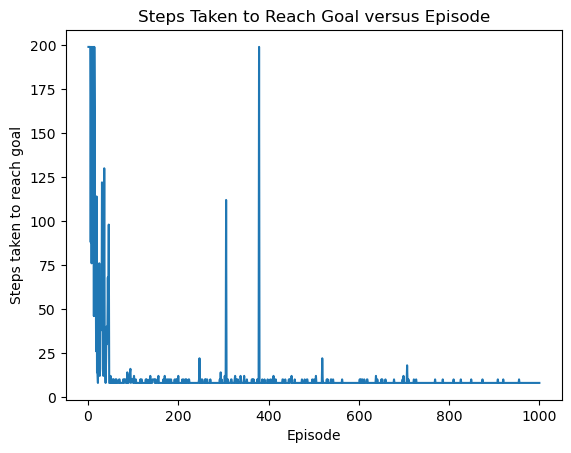

In [11]:
#Now we want to try a modified version where the agent's decision is not fixed at 90% determinant, 10% random, 
# but rather less and less random over iterations
#In this version, the function decision has one more parameter: iteration

#1/a 2D array to represent the states in the environment (done)
environment = [(25,24,23,22,21),
(20,19,18,17,16),
(15,14,13,12,11),
(10,9,8,7,6),
(5,4,3,2,1)]

#2/a q-table dictionary for each of the state, filed with uniformly distributed values between 110-120
import random
states = list(range(1, 25, 1))
#generate a list of 4 uniformly distributed random values between 110 and 120
q_table = {
    state: [random.uniform(110, 120) for _ in range(4)]
    for state in states
}


#3/a loop that gives -1 reward for each step taken, and -30 reward when in the hole region, and +100 reward when reaching the goal
direction = [5,-5,1,-1] #up, down, left, right
S0 = 1 #initial position
next_state = S0;

step_memory = {}

def decision(start_state, iteration):
    if start_state == 1:
        options = [q_table[start_state][i] for i in [0,2]]    
    elif start_state == 5:
        options = [q_table[start_state][i] for i in [0,3]]
    elif start_state == 21:
        options = [q_table[start_state][i] for i in [1,2]]
    elif start_state in (6,11,16):
        options = [q_table[start_state][i] for i in [0,1,2]]
    elif start_state in (2,3,4):
        options = [q_table[start_state][i] for i in [0,2,3]]
    elif start_state in (10,15,20):
        options = [q_table[start_state][i] for i in [0,1,3]]
    elif start_state in (22,23,24):
        options = [q_table[start_state][i] for i in [1,2,3]]
    else:
        options = [q_table[start_state][i] for i in [0,1,2,3]]
    
    determination = 0.9 + iteration*(1/1000)*0.1
    if random.random() < determination:
        return q_table[start_state].index(max(options))
    else:
        return q_table[start_state].index(random.choice(options))

graph_step = []
graph_iteration = list(range(1,1001))
iteration = 1

for iteration in range(1000):
    next_state = 1
    step_memory = {}
    step = 1
    while next_state < 25:
        if step < 200:
            start_state = next_state
            movement = decision(start_state,iteration)
            next_state = next_state + direction[movement]
            step_memory[step] = [next_state,start_state, movement]
            step = step + 1
        else:
            break
    
    sequence = list(reversed(list(step_memory.items())))
    total_return_Gt = 0
    overstep_penalty = -10

    for i in sequence: 
        if i[1][0] == 25:
            action_reward = 99
        elif i[1][0] in (13,14,18,19) and i[1][1] not in (13,14,18,19):
            action_reward = -31
        else:
            action_reward = -1
            

        if i[0] <20:
            total_return_Gt = action_reward + total_return_Gt
        else:
            total_return_Gt = action_reward + total_return_Gt + overstep_penalty

        q_table[i[1][1]][i[1][2]] = q_table[i[1][1]][i[1][2]]*0.9 + total_return_Gt*0.1
    
    graph_step.append(list(step_memory.keys())[-1])
    iteration = iteration + 1

import matplotlib.pyplot as plt
plt.plot(graph_iteration, graph_step)
plt.xlabel("Episode")
plt.ylabel("Steps taken to reach goal")
plt.title("Steps Taken to Reach Goal versus Episode")
plt.show
    
    
print(q_table)
print(f"Final Steps taken: {list(step_memory.keys())[-1]}\nFinal Path taken: {[value[0] for value in step_memory.values()]}")

The remaining problem is that the agent still steps into the hole after 1000 iterations. This does not meet out goal of maximising rewards. Maybe an algorithm has been neglected which defines the desire to maximise rewards?